In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [3]:
k = np.empty((np.shape(p)[0], np.shape(q)[0]))

In [4]:
range(np.shape(p)[0])

range(0, 4)

In [5]:
for j in range((np.shape(q)[0])):
    print(j)

0
1
2
3
4


In [29]:
def naive(p, q):
    k = np.empty((p.shape[0], q.shape[0]))
    for i in range(4):
        for j in range(5):
            k[i, j] = math.sqrt(((p[i, 1] - q[j, 1]) ** 2) + ((p[i, 0] - q[j, 0]) ** 2))
    
    return k
            

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [7]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [8]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [9]:
p

array([[0.77132064, 0.02075195],
       [0.63364823, 0.74880388],
       [0.49850701, 0.22479665],
       [0.19806286, 0.76053071]])

In [10]:
q

array([[0.16911084, 0.08833981],
       [0.68535982, 0.95339335],
       [0.00394827, 0.51219226],
       [0.81262096, 0.61252607],
       [0.72175532, 0.29187607]])

In [11]:
p[rows, 1] - q[cols, 1]

array([[-0.06758786, -0.9326414 , -0.49144031, -0.59177412, -0.27112412],
       [ 0.66046407, -0.20458946,  0.23661162,  0.13627782,  0.45692781],
       [ 0.13645683, -0.7285967 , -0.28739562, -0.38772942, -0.06707942],
       [ 0.6721909 , -0.19286263,  0.24833845,  0.14800465,  0.46865464]])

In [12]:
np.power((p[rows, 1] - q[cols, 1]), 2)

array([[0.00456812, 0.86981998, 0.24151358, 0.35019661, 0.07350829],
       [0.43621279, 0.04185685, 0.05598506, 0.01857164, 0.20878303],
       [0.01862047, 0.53085315, 0.08259624, 0.1503341 , 0.00449965],
       [0.4518406 , 0.037196  , 0.06167199, 0.02190538, 0.21963718]])

In [13]:
def with_indices(p, q):
    return np.power(np.power((p[rows, 1] - q[cols, 1]), 2) + np.power((p[rows, 0] - q[cols, 0]), 2), 0.5)
    

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [14]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [15]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [31]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

43 µs ± 1.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
25.1 µs ± 406 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
529 µs ± 7.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.17 ms ± 33.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


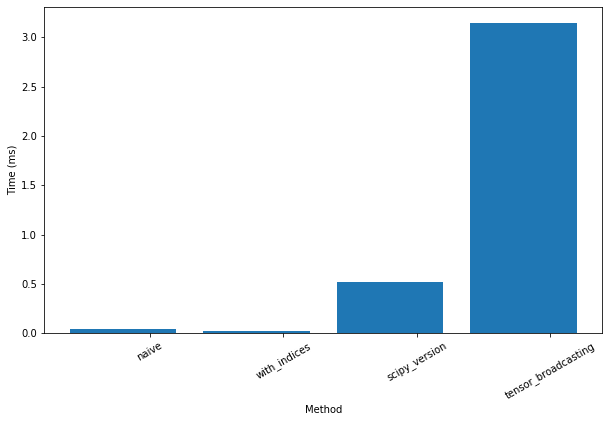

In [32]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()

In [30]:
print(naive(p, q))

[[0.60599073 0.93659449 0.91124856 0.59321356 0.27561751]
 [0.80746999 0.21102354 0.67268649 0.22495084 0.46534491]
 [0.35654215 0.75217493 0.57200052 0.49900068 0.23310825]
 [0.67281411 0.52407472 0.31520226 0.63212897 0.70277376]]


In [22]:
print(with_indices(p, q))

[[0.60599073 0.93659449 0.91124856 0.59321356 0.27561751]
 [0.80746999 0.21102354 0.67268649 0.22495084 0.46534491]
 [0.35654215 0.75217493 0.57200052 0.49900068 0.23310825]
 [0.67281411 0.52407472 0.31520226 0.63212897 0.70277376]]


In [23]:
scipy_version(p, q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

In [24]:
print(tensor_broadcasting(p, q))

[[0.60599073 0.93659449 0.91124856 0.59321356 0.27561751]
 [0.80746999 0.21102354 0.67268649 0.22495084 0.46534491]
 [0.35654215 0.75217493 0.57200052 0.49900068 0.23310825]
 [0.67281411 0.52407472 0.31520226 0.63212897 0.70277376]]
